In [3]:
cd Parallel-OMP

/WAVE/users2/unix/wdurbano/csen145/CNN-CPP/Parallel-OMP


In [4]:
cd logs

/WAVE/users2/unix/wdurbano/csen145/CNN-CPP/Parallel-OMP/logs


In [5]:
import re
import pandas as pd

# Read the log file
with open('CNN.74966.mem01.log', 'r') as file:
    log_data = file.read()

# Define regex patterns for thread count, total training time, and total testing time
thread_pattern = r"Thread count:\s*(\d+)"

# Pattern for total time in training and testing
train_time_pattern = r"\[Train\].*?Total time:\s*([\d.]+)\s*s"
test_time_pattern = r"\[Valid\].*?Total time:\s*([\d.]+)\s*s"

# Extract thread count
thread_count_matches = re.findall(thread_pattern, log_data)

# Extract total times for training and testing
train_time_matches = re.findall(train_time_pattern, log_data)
test_time_matches = re.findall(test_time_pattern, log_data)

# Check if the regex patterns matched any data
print(f"Found {len(train_time_matches)} training total times")
print(f"Found {len(test_time_matches)} testing total times")
print(f"Found {len(thread_count_matches)} thread count entries")

# Ensure that we have the same number of thread counts, training times, and testing times
min_length = min(len(train_time_matches), len(test_time_matches), len(thread_count_matches))

# Create a DataFrame to hold the data
data = {
    "Thread Count": thread_count_matches[:min_length],
    "Train Total Time (s)": train_time_matches[:min_length],
    "Test Total Time (s)": test_time_matches[:min_length]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert numeric columns to appropriate types
df["Thread Count"] = df["Thread Count"].astype(int)
df["Train Total Time (s)"] = df["Train Total Time (s)"].astype(float)
df["Test Total Time (s)"] = df["Test Total Time (s)"].astype(float)

# Display the DataFrame
print("\nExtracted DataFrame:")
print(df)

Found 15 training total times
Found 15 testing total times
Found 15 thread count entries

Extracted DataFrame:
    Thread Count  Train Total Time (s)  Test Total Time (s)
0              1                188.79                23.89
1              2                122.79                13.35
2              3                 93.59                 9.98
3              4                 82.20                 7.93
4              5                 69.88                 6.84
5              6                 66.18                 5.80
6              7                 80.71                 5.11
7              8                 76.35                 4.41
8             12                 62.10                 4.29
9             14                187.10                 4.57
10            16                140.97                 4.22
11            18                 90.33                 4.38
12            20                 76.82                 4.38
13            22                130.22           

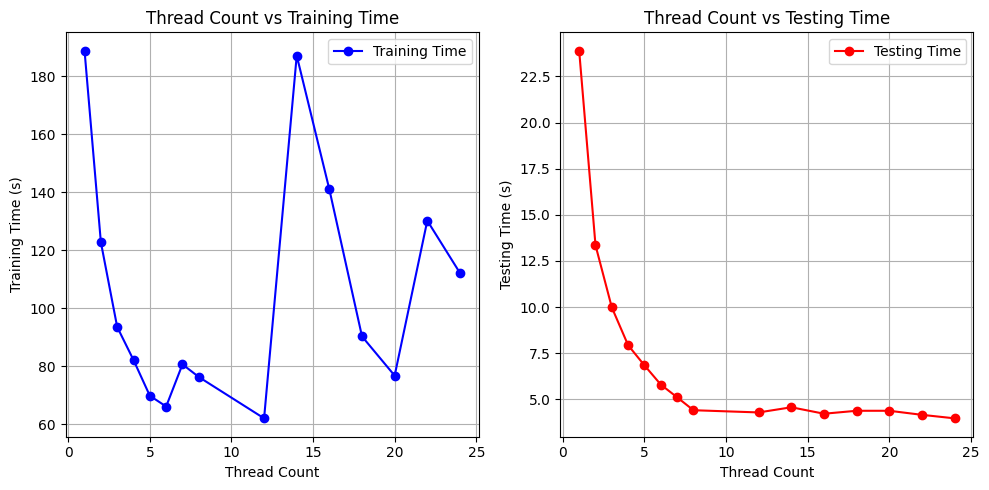

In [6]:
import matplotlib.pyplot as plt

# Plot thread count vs training time
plt.figure(figsize=(10, 5))

# Plot for Training Total Time
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
plt.plot(df["Thread Count"], df["Train Total Time (s)"], marker='o', color='b', label="Training Time")
plt.title("Thread Count vs Training Time")
plt.xlabel("Thread Count")
plt.ylabel("Training Time (s)")
plt.grid(True)
plt.legend()

# Plot for Testing Total Time
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
plt.plot(df["Thread Count"], df["Test Total Time (s)"], marker='o', color='r', label="Testing Time")
plt.title("Thread Count vs Testing Time")
plt.xlabel("Thread Count")
plt.ylabel("Testing Time (s)")
plt.grid(True)
plt.legend()

# Show the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [14]:
import re
import pandas as pd

# Read the log file, SHOULD CONTAIN A THREAD COUNT
with open('CNN.74970.mem01.log', 'r') as file:
    log_data = file.read()

# Define regex patterns for thread count, total training time, and total testing time
thread_pattern = r"Thread count:\s*(\d+)"

# Pattern for total time in training and testing
train_time_pattern = r"\[Train\].*?Total time:\s*([\d.]+)\s*s"
test_time_pattern = r"\[Valid\].*?Total time:\s*([\d.]+)\s*s"

# Extract thread count
thread_count_matches = re.findall(thread_pattern, log_data)

# Extract total times for training and testing
train_time_matches = re.findall(train_time_pattern, log_data)
test_time_matches = re.findall(test_time_pattern, log_data)

# Check if the regex patterns matched any data
print(f"Found {len(train_time_matches)} training total times")
print(f"Found {len(test_time_matches)} testing total times")
print(f"Found {len(thread_count_matches)} thread count entries")

# Ensure that we have the same number of thread counts, training times, and testing times
min_length = min(len(train_time_matches), len(test_time_matches), len(thread_count_matches))

# Create a DataFrame to hold the data
data = {
    "Thread Count": thread_count_matches[:min_length],
    "Train Total Time (s)": train_time_matches[:min_length],
    "Test Total Time (s)": test_time_matches[:min_length]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert numeric columns to appropriate types
df["Thread Count"] = df["Thread Count"].astype(int)
df["Train Total Time (s)"] = df["Train Total Time (s)"].astype(float)
df["Test Total Time (s)"] = df["Test Total Time (s)"].astype(float)

# Display the DataFrame
print("\nExtracted DataFrame:")
print(df)


Found 15 training total times
Found 15 testing total times
Found 15 thread count entries

Extracted DataFrame:
    Thread Count  Train Total Time (s)  Test Total Time (s)
0              1                174.94                22.20
1              2                123.04                13.40
2              3                 92.81                 9.85
3              4                 84.73                 8.06
4              5                 70.20                 6.85
5              6                 67.33                 5.78
6              7                 80.51                 5.14
7              8                 72.80                 4.40
8             12                 60.19                 4.33
9             14                229.65                 3.41
10            16                257.02                 3.06
11            18                 90.98                 4.35
12            20                 74.24                 4.18
13            22                197.14           

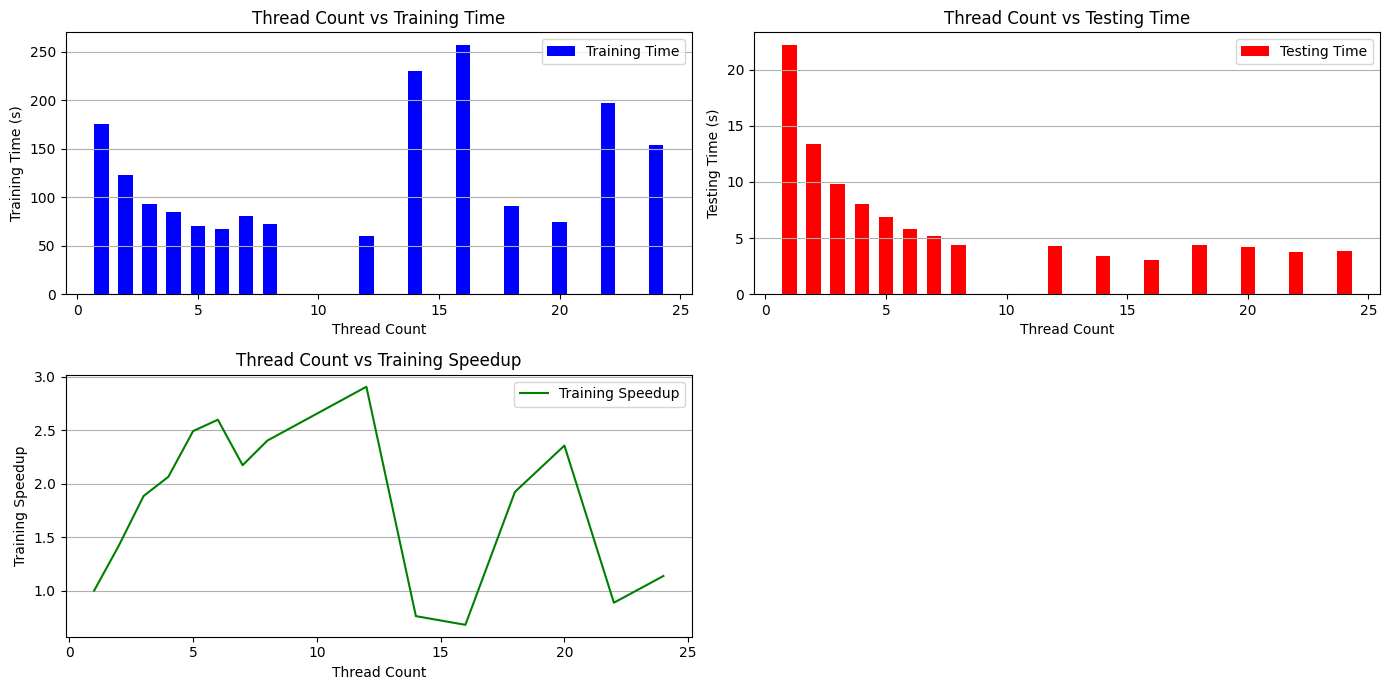

In [22]:
import matplotlib.pyplot as plt

# Get the time for 1 thread
train_time_1_thread = df[df["Thread Count"] == 1]["Train Total Time (s)"].values[0]
test_time_1_thread = df[df["Thread Count"] == 1]["Test Total Time (s)"].values[0]

# Calculate speedup for training and testing
df["Train Speedup"] = train_time_1_thread / df["Train Total Time (s)"]
df["Test Speedup"] = test_time_1_thread / df["Test Total Time (s)"]

# Plot thread count vs training time and speedup as bar graphs
plt.figure(figsize=(14, 7))

# Define the bar width (narrower to avoid spacing out)
bar_width = 0.6

# Plot for Training Total Time
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st plot
plt.bar(df["Thread Count"], df["Train Total Time (s)"], width=bar_width, color='b', label="Training Time")
plt.title("Thread Count vs Training Time")
plt.xlabel("Thread Count")
plt.ylabel("Training Time (s)")
# plt.xticks(df["Thread Count"].astype(int))  # Ensure integer x-axis ticks
plt.grid(True, axis='y')
plt.legend()

# Plot for Testing Total Time
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd plot
plt.bar(df["Thread Count"], df["Test Total Time (s)"], width=bar_width, color='r', label="Testing Time")
plt.title("Thread Count vs Testing Time")
plt.xlabel("Thread Count")
plt.ylabel("Testing Time (s)")
# plt.xticks(df["Thread Count"].astype(int))  # Ensure integer x-axis ticks
plt.grid(True, axis='y')
plt.legend()

# Plot for Training Speedup
plt.subplot(2, 2, 3)  # 2 rows, 2 columns, 3rd plot
plt.plot(df["Thread Count"], df["Train Speedup"], color='g', label="Training Speedup")
plt.title("Thread Count vs Training Speedup")
plt.xlabel("Thread Count")
plt.ylabel("Training Speedup")

plt.grid(True, axis='y')
plt.legend()

# # Plot for Testing Speedup
# plt.subplot(2, 2, 4)  # 2 rows, 2 columns, 4th plot
# plt.plot(df["Thread Count"], df["Test Speedup"], color='orange', label="Testing Speedup")
# plt.title("Thread Count vs Testing Speedup")
# plt.xlabel("Thread Count")
# plt.ylabel("Testing Speedup")
# plt.xticks(df["Thread Count"].astype(int))  # Ensure integer x-axis ticks
# plt.grid(True, axis='y')
# plt.legend()

# Show the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [ ]:
import re
import pandas as pd

# Read the log file, NO THREAD COUNT
with open('CNN.74966.mem01.log', 'r') as file:
    log_data = file.read()


# Pattern for total time in training and testing
train_time_pattern = r"\[Train\].*?Total time:\s*([\d.]+)\s*s"
test_time_pattern = r"\[Valid\].*?Total time:\s*([\d.]+)\s*s"

# Extract total times for training and testing
train_time_matches = re.findall(train_time_pattern, log_data)
test_time_matches = re.findall(test_time_pattern, log_data)

# Check if the regex patterns matched any data
print(f"Found {len(train_time_matches)} training total times")
print(f"Found {len(test_time_matches)} testing total times")

# Create a DataFrame to hold the data
data = {
    "Train Total Time (s)": train_time_matches[:min_length],
    "Test Total Time (s)": test_time_matches[:min_length]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert numeric columns to appropriate types
df["Train Total Time (s)"] = df["Train Total Time (s)"].astype(float)
df["Test Total Time (s)"] = df["Test Total Time (s)"].astype(float)

# Display the DataFrame
print("\nExtracted DataFrame:")
print(df)


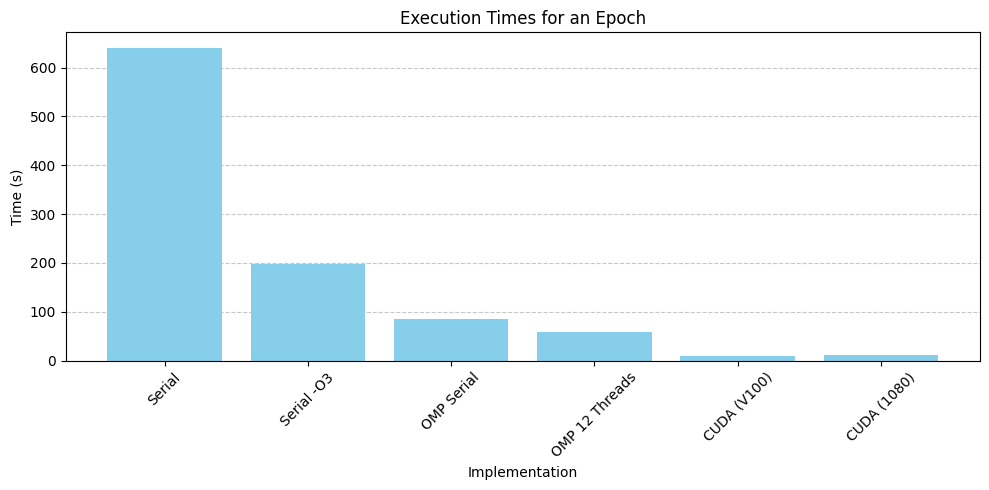

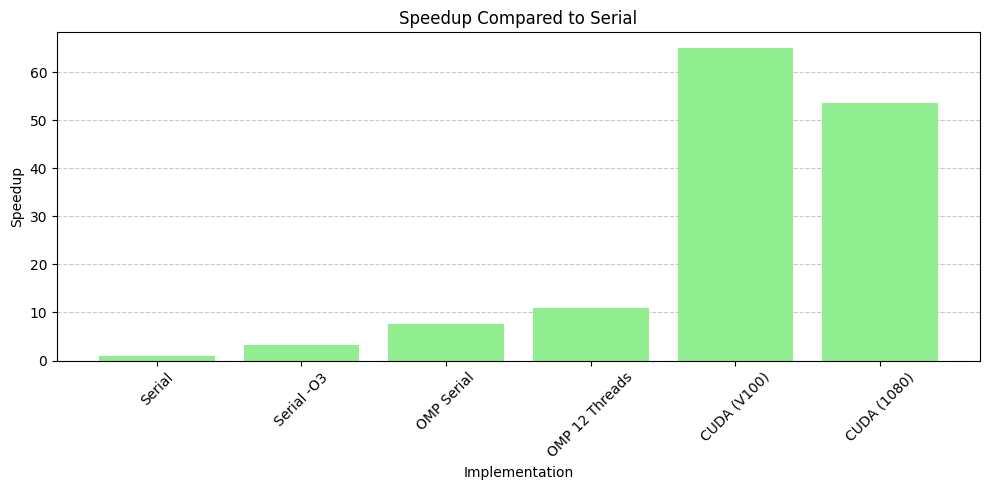

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Data
labels = [
    "Serial",
    "Serial -O3",
    "OMP Serial",
    "OMP 12 Threads",
    "CUDA (V100)",
    "CUDA (1080)"
]
times = [640.35, 197.6, 84.74, 58.3, 9.85, 11.97]

# Compute speedup relative to Serial
serial_time = times[0]
speedups = [serial_time / t for t in times]

# Bar Chart of Execution Times
plt.figure(figsize=(10, 5))
plt.bar(labels, times, color='skyblue', zorder=2)
plt.title("Execution Times for an Epoch")
plt.ylabel("Time (s)")
plt.xlabel("Implementation")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)  # Grid behind bars
plt.tight_layout()
plt.savefig("execution_times.png", dpi=300)  # Save the figure
plt.show()

# Bar Chart of Speedup
plt.figure(figsize=(10, 5))
plt.bar(labels, speedups, color='lightgreen', zorder=2)
plt.title("Speedup Compared to Serial")
plt.ylabel("Speedup")
plt.xlabel("Implementation")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)  # Grid behind bars
plt.tight_layout()
plt.savefig("speedup_chart.png", dpi=300)  # Save the figure
plt.show()
